In [1]:
import kagglehub
import pandas as pd 
import seaborn as sns 


In [ ]:
# # Download latest version
# path = kagglehub.dataset_download("adarsh2626/old-art-style-images-with-captions-dataset")

# print("Path to dataset files:", path)

In [10]:
#Dataset heruntergeladen


df_orig = pd.read_csv('caption.csv')
df = df_orig.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4198 entries, 0 to 4197
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           4198 non-null   int64 
 1   artist_name  4197 non-null   object
 2   caption      4198 non-null   object
 3   url          4198 non-null   object
 4   description  4094 non-null   object
dtypes: int64(1), object(4)
memory usage: 164.1+ KB


In [11]:
#Kunststil extrahieren
df['style_split'] = df['url'].str.split('/').str[-2]
df['style_split'].head()

0             glance-detroit
1         pula-arena-temples
2       pula-temple-augustus
3              deer-verneuil
4    golden-pheasant-ladybug
Name: style_split, dtype: object

In [12]:
#Erstellen fake style in url, dann extrahieren noch mal und machen categorien
df['style_len'] = df['style_split'].str.len()
df['style_len'].head()

0    14
1    18
2    20
3    13
4    23
Name: style_len, dtype: int64

In [13]:
df["style"] = pd.cut(
    df['style_len'],
    bins=5, labels=['Baroque', 'Vintage', 'Minimalist', 'Classical', 'Romantic']
)
df['style'].head()



0       Vintage
1    Minimalist
2     Classical
3       Vintage
4     Classical
Name: style, dtype: category
Categories (5, object): ['Baroque' < 'Vintage' < 'Minimalist' < 'Classical' < 'Romantic']

In [14]:
df.isna().sum()


id               0
artist_name      1
caption          0
url              0
description    104
style_split      0
style_len        0
style            0
dtype: int64

In [15]:
df.dropna(inplace=True)
df.isna().sum()

id             0
artist_name    0
caption        0
url            0
description    0
style_split    0
style_len      0
style          0
dtype: int64

In [16]:
# drop hilf-columns
df.columns
# df = df.drop(columns=['style_split','style_len'])
# df.columns

Index(['id', 'artist_name', 'caption', 'url', 'description', 'style_split',
       'style_len', 'style'],
      dtype='object')

In [17]:
# drop hilf-columns
df = df.drop(columns=['style_split','style_len'])
df.columns

Index(['id', 'artist_name', 'caption', 'url', 'description', 'style'], dtype='object')

In [ ]:
df['style']=df['style'].astype('category')#style in category
print(f"Mem_orig = {df_orig.memory_usage(deep=True).sum()}, Mem_now = {df.memory_usage(deep=True).sum()}")

Mem_orig = 2945838, Mem_now = 2953550


In [ ]:
#Erstelle eine neue Spalte caption_length, die die Anzahl der Wörter in der Bildunterschrift zählt.
df['caption_length'] = df['description'].apply(lambda x: len(x.split())) #für jede wert in df['description]
df['caption_length'].head()

0     55
1    207
2     51
3     36
4     58
Name: caption_length, dtype: int64

In [ ]:
#Prüfe, ob caption_length als int16 gespeichert werden kann.
# df['caption_length'] = df['caption_length'].apply(pd.to_numeric, downcast="integer") 
df["caption_length"] = pd.to_numeric(df["caption_length"], downcast="integer")
df['caption_length'].dtype
#kann als int16 gespeichert werden abre nur mit 2. Befehl
# df['caption_length'].max()
# df['caption_length'].min()

dtype('int16')

In [ ]:
#Pivot Tabelle
df_pivot = df.pivot_table(
    index="style",                
    values="caption_length",      
    aggfunc=["mean", "count"],
    observed=False    
)
df_pivot.columns = ["avg_text_length", "num_images"]
df_pivot
#Romantic ist am besten dokumentiert

,avg_text_length,num_images
style,,
Baroque,39.001905,525
Vintage,40.219575,1931
Minimalist,46.987730,1141
Classical,48.296729,428
Romantic,55.970588,68


<Axes: xlabel='style', ylabel='num_images'>

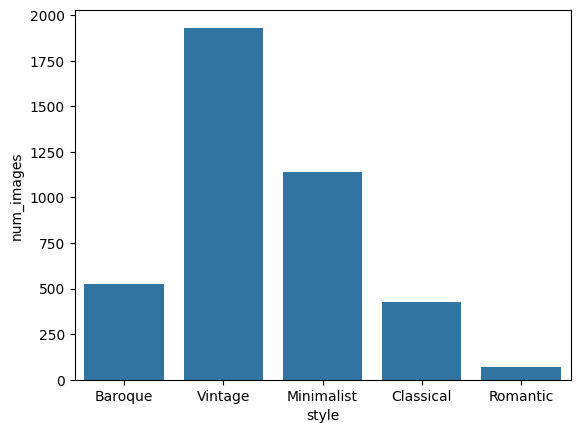

In [49]:
#plot
sns.barplot(
    data=df_pivot,
    x='style',
    y='num_images')